# Random Forest Tree Model

#### Add libraries

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns
from statistics import mean
from sklearn.ensemble import RandomForestRegressor

#### Add the database 2005-2010

In [63]:
# Data for 2005 to 2010 
dataset = pd.read_csv('../Data/features_2005_2010_referenced.csv')
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140720 entries, 0 to 1140719
Data columns (total 21 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1140720 non-null  int64  
 1   id               1140720 non-null  int64  
 2   diversity        1140720 non-null  float64
 3   venue_rank       1140720 non-null  float64
 4   venue_MPI        1140720 non-null  int64  
 5   venue_TPI        1140720 non-null  int64  
 6   productivity     1140720 non-null  float64
 7   H_index          1140720 non-null  float64
 8   author_rank      1140720 non-null  float64
 9   author_MPI       1140720 non-null  float64
 10  author_TPI       1140720 non-null  float64
 11  versatility      1140720 non-null  float64
 12  n_citation       1140720 non-null  int64  
 13  referenced_by    1140720 non-null  object 
 14  referenced_year  1140720 non-null  object 
 15  citation         1140720 non-null  float64
 16  citation_diff    1

In [64]:
# Data for 2010 to extract the paper ids from year 2010
id_2010 = pd.read_csv('../Data/papers2010.csv')
id_2010.head()

Unnamed: 0      id                                            authors  \
0           0  117599  [{'name': 'Horacio Saggion', 'org': 'Universit...   
1           1  133010  [{'name': 'Vadim Ermolayev', 'org': 'Cadence D...   
2           2  182605  [{'name': 'Rohit Kumar', 'org': 'Carnegie Mell...   
3           3  192912  [{'name': 'Prokopios Drogkaris', 'org': 'Labor...   
4           4  215073  [{'name': 'Chunfeng Liu', 'org': 'Hebei Polyte...   

                                               title  year  n_citation  \
0  Inserting rhetorical predicates for quasi-abst...  2010           1   
1  Articulation and Sharing of Distributed Design...  2010           2   
2  Engaging learning groups using Social Interact...  2010           2   
3  Attaching multiple personal identifiers in X.5...  2010           0   
4  Research on a Class of Ordinary Differential E...  2010           0   

                                          references  \
0  [4508078, 2082416349, 2101390659, 2169546346, ...   
1  [53456027, 63764177, 99644187, 103455988, 1067...   
2  [1510324139, 1980982162, 2101963588, 212166507...   
3  [1660562555, 2088103037, 2092374634, 224378568...   
4                                                NaN   

                                                 fos  \
0  [{'name': 'Multi-document summarization', 'w':...   
1  [{'name': 'Project plan', 'w': 0.63773}, {'nam...   
2  [{'name': 'Social relation', 'w': 0.47114}, {'...   
3  [{'name': 'Internet privacy', 'w': 0.46058}, {...   
4  [{'name': 'Slag', 'w': 0.42915}, {'name': 'Run...   

                                               venue  
0  {'raw': "RIAO '10 Adaptivity, Personalization ...  
1                                     {'raw': 'IDC'}  
2  {'raw': 'North American Chapter of the Associa...  
3  {'raw': 'European Public Key Infrastructure Wo...  
4  {'raw': 'international conference on Informati...

In [66]:
# Split data for train and test 
ids = id_2010['id'].tolist() 
train = dataset[dataset['id'].isin(ids) == False]
test = dataset[dataset['id'].isin(ids)]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919995 entries, 0 to 1140719
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       919995 non-null  int64  
 1   id               919995 non-null  int64  
 2   diversity        919995 non-null  float64
 3   venue_rank       919995 non-null  float64
 4   venue_MPI        919995 non-null  int64  
 5   venue_TPI        919995 non-null  int64  
 6   productivity     919995 non-null  float64
 7   H_index          919995 non-null  float64
 8   author_rank      919995 non-null  float64
 9   author_MPI       919995 non-null  float64
 10  author_TPI       919995 non-null  float64
 11  versatility      919995 non-null  float64
 12  n_citation       919995 non-null  int64  
 13  referenced_by    919995 non-null  object 
 14  referenced_year  919995 non-null  object 
 15  citation         919995 non-null  float64
 16  citation_diff    919995 non-null  flo

In [55]:
# Set ytrain and Xtrain
y_train = train.iloc[:,18]
X_train = train.iloc[:,2:12]
print(y_train)
X_train.head()

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1140715    0.0
1140716    0.0
1140717    0.0
1140718    0.0
1140719    0.0
Name: citation_2yr, Length: 919995, dtype: float64


diversity  venue_rank  venue_MPI  venue_TPI  productivity    H_index  \
0   1.677395     11859.0        302       7688    170.000000  30.000000   
1   1.068871     11859.0        302       7688      1.000000   0.000000   
2   1.821750     11859.0        302       7688      7.000000   2.000000   
3   1.081691     11859.0        302       7688      9.333333   5.333333   
4   2.869217     11859.0        302       7688      1.000000   1.000000   

    author_rank  author_MPI   author_TPI  versatility  
0  3.517015e+05  194.000000  3250.000000    10.353863  
1  1.385029e+06    0.000000     0.000000     1.068871  
2  1.047068e+06    6.000000    14.000000     5.254207  
3  7.159053e+05   20.333333   102.333333     6.736735  
4  1.047068e+06    2.000000     2.000000     2.869217

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220725 entries, 216 to 1140709
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       220725 non-null  int64  
 1   id               220725 non-null  int64  
 2   diversity        220725 non-null  float64
 3   venue_rank       220725 non-null  float64
 4   venue_MPI        220725 non-null  int64  
 5   venue_TPI        220725 non-null  int64  
 6   productivity     220725 non-null  float64
 7   H_index          220725 non-null  float64
 8   author_rank      220725 non-null  float64
 9   author_MPI       220725 non-null  float64
 10  author_TPI       220725 non-null  float64
 11  versatility      220725 non-null  float64
 12  n_citation       220725 non-null  int64  
 13  referenced_by    220725 non-null  object 
 14  referenced_year  220725 non-null  object 
 15  citation         220725 non-null  float64
 16  citation_diff    220725 non-null  f

In [56]:
# Set ytest and Xtest
y_test = test.iloc[:,18]
X_test = test.iloc[:,2:12]
print(y_test)
X_test.head()

216        1.0
417        1.0
421        0.0
440        1.0
441        1.0
          ... 
1140665    0.0
1140681    0.0
1140688    0.0
1140700    0.0
1140709    0.0
Name: citation_2yr, Length: 220725, dtype: float64


diversity  venue_rank  venue_MPI  venue_TPI  productivity   H_index  \
216   3.561625     11859.0        302       7688     15.500000  7.000000   
417   1.669966     11859.0        302       7688     25.000000  8.000000   
421   1.992607     11859.0        302       7688     19.000000  6.000000   
440   2.749466     11859.0        302       7688      7.333333  3.333333   
441   3.376685     11859.0        302       7688     18.333333  5.333333   

       author_rank  author_MPI  author_TPI  versatility  
216  482017.750000   63.500000  215.500000    10.951452  
417  566961.500000   68.000000  279.500000    11.066745  
421  773036.500000   16.000000  100.000000     7.633989  
440  841711.166667   14.333333   57.333333     6.582855  
441  815947.833333   25.333333  120.666667    10.587081

#### Check the length of training-set vs. testing-set

In [67]:
print("dataset length:", len(dataset))
print("trainset length:", len(train))
print("testset length:", len(test))
train.describe()

dataset length: 1140720
trainset length: 919995
testset length: 220725


Unnamed: 0            id      diversity     venue_rank  \
count  9.199950e+05  9.199950e+05  919995.000000  919995.000000   
mean   5.587844e+05  1.921696e+09       3.038119    6572.385399   
std    3.279100e+05  5.762127e+08       0.844790    4654.027740   
min    0.000000e+00  1.688000e+03       0.000000       6.000000   
25%    2.739235e+05  1.968694e+09       2.502694    2496.000000   
50%    5.553490e+05  2.080178e+09       3.284733    5729.000000   
75%    8.390520e+05  2.140605e+09       3.664568    9778.000000   
max    1.140719e+06  3.009038e+09       5.264496   23780.000000   

           venue_MPI      venue_TPI   productivity        H_index  \
count  919995.000000  919995.000000  919995.000000  919995.000000   
mean     2011.490739   78335.073836      28.426493       9.040344   
std      4011.339985  144072.757902      35.177137       8.704456   
min         0.000000       0.000000       1.000000       0.000000   
25%       172.000000    3436.000000       4.400000       2.500000   
50%       579.000000   15956.000000      17.000000       6.750000   
75%      1762.000000   76275.000000      39.250000      13.000000   
max     35541.000000  861394.000000     696.000000     127.000000   

        author_rank     author_MPI     author_TPI    versatility  \
count  9.199950e+05  919995.000000  919995.000000  919995.000000   
mean   5.675140e+05     206.418658    1048.991826       9.220084   
std    3.600651e+05     553.763543    2313.388827       3.929258   
min    3.400000e+01       0.000000       0.000000       0.000000   
25%    2.850858e+05      18.333333      42.666667       6.367243   
50%    5.012482e+05      69.888889     291.500000       9.630361   
75%    7.859786e+05     196.000000    1050.000000      12.205169   
max    1.385029e+06   42437.000000   86494.000000      22.569728   

          n_citation       citation  citation_diff   citation_1yr  \
count  919995.000000  919995.000000  919995.000000  919995.000000   
mean       21.744203      11.524388       9.934311       1.251640   
std       101.308820      51.873596      65.457465       4.783832   
min         0.000000       0.000000      -5.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         5.000000       3.000000       2.000000       0.000000   
75%        18.000000       9.000000       7.000000       1.000000   
max     21301.000000   13688.000000   19954.000000    1755.000000   

        citation_2yr   citation_5yr  citation_10yr  
count  919995.000000  919995.000000  919995.000000  
mean        2.390358       5.866369      10.413127  
std         7.478109      19.361242      44.054870  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         1.000000       2.000000       2.000000  
75%         3.000000       6.000000       9.000000  
max      2182.000000    3988.000000    8811.000000

#### Default random forest regressor

In [17]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

#### random forest regressor after hyperparameter optimization

In [57]:
regressor = RandomForestRegressor(n_estimators = 32, random_state = 0, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 60, bootstrap =  True)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, min_samples_leaf=2, n_estimators=32,
                      random_state=0)

In [58]:
y_predict = regressor.predict(X_test)
y_predict

array([0.9844122 , 1.36912202, 0.86324405, ..., 0.17447917, 0.        ,
       0.        ])

## Evaluation

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.16581566252526847

#### Results:

- with 2001 feature scaling: R^2 = 0.7478487050227631
- with 2001 and without feature scaling: R^2 = 0.7626017658170675
- with 2005-2010 data: 0.36028627676341185
- with 2005-2010 data after feature engineering (taking 6 features): 0.25029364349580974
- with 2005-2010 data after hyper parameter checking: 0.364900392854984
- with 2005-2010 new data (fixed h-index author info comming from start to 2010) after hyper parameter checking: 0.2924926183547069
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation = 0.21508490047673495
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (5 years) = 0.26353263986459385
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (10 years) = 0.24314624983966276
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (2 years) = 0.1664251404611239

In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.0033861885250412
Mean Squared Error: 77.24266477576455
Root Mean Squared Error: 8.788780619389959


#### Results:

march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (2 years)

- Mean Absolute Error: 2.0033861885250412
- Mean Squared Error: 77.24266477576455
- Root Mean Squared Error: 8.788780619389959

march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (10 years)

- Mean Absolute Error: 7.544111040439684
- Mean Squared Error: 1415.6939273307796
- Root Mean Squared Error: 37.62570832995413

march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (5 years)

- Mean Absolute Error: 4.5363458634174325
- Mean Squared Error: 379.0101621317011
- Root Mean Squared Error: 19.46818332900379

march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation

- Mean Absolute Error: 7.878812335465482
- Mean Squared Error: 1579.635787885676
- Root Mean Squared Error: 39.74463218958852

with 2005-2010 data:

- Mean Absolute Error: 12.03716577943897

- Mean Squared Error: 4654.140429817772

- Root Mean Squared Error: 68.22126083427199

with 2005-2010 data after feature engineering (taking 6 features):

- Mean Absolute Error: 17.281580556499417
- Mean Squared Error: 5693.088277457787
- Root Mean Squared Error: 75.45255646734434

with 2005-2010 data after hyper parameter checking:

- Mean Absolute Error: 11.459144893246135
- Mean Squared Error: 4415.1068365931305
- Root Mean Squared Error: 66.44627029858884

with 2005-2010 new data after hyper parameter checking:
    
- Mean Absolute Error: 12.152911093904619
- Mean Squared Error: 5050.021833340039
- Root Mean Squared Error: 71.06350563643788

with 2001 data:

- Mean Absolute Error: 16.10695725324028

- Mean Squared Error: 51171.48335197533

- Root Mean Squared Error: 226.21114771817795

#### MSE results:

- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation = citaition in the paper: 1579.635787885588
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (5 years) = 379.0101621317477
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (10 years) = 1415.693927330848
- march 31st: 2005-2010 data, after hyper parameter checking, new dataset where citation (2 years) = 77.24266477575634
- with 2005-2010 data: 4654.140429817595
- with 2005-2010 data after feature engineering (taking 6 features): 5693.088277457823
- with 2005-2010 data after hyper parameter checking: 4415.106836593595
- with 2005-2010 new data after hyper parameter checking: 5050.021833340288
- with 2001 data: 51171.48335197533


## Feature Engineering

In [38]:
# feature importance in eye of the random forest regresor model

feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: author_rank          Importance: 0.26
Variable: author_MPI           Importance: 0.13
Variable: venue_MPI            Importance: 0.09
Variable: diversity            Importance: 0.08
Variable: venue_rank           Importance: 0.08
Variable: productivity         Importance: 0.08
Variable: author_TPI           Importance: 0.08
Variable: versatility          Importance: 0.08
Variable: venue_TPI            Importance: 0.07
Variable: H_index              Importance: 0.06


[None, None, None, None, None, None, None, None, None, None]

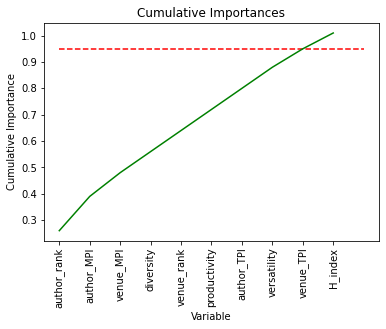

In [39]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

Now we try to take the features which result in the top 95% of the importance

In [149]:
# after feature engineering
new_train = train[['author_rank','venue_MPI','author_MPI','versatility','diversity','n_citation']].copy()
new_test = test[['author_rank','venue_MPI','author_MPI','versatility','diversity','n_citation']].copy()
new_train.head()

author_rank  venue_MPI  author_MPI  versatility  diversity  n_citation
0   570776.125        596        8.50     4.121027   2.092323           6
1   484296.500        596       49.00    11.974520   3.207160          10
2  1070269.000        596        0.00     3.810342   3.810342           0
3   608913.000        596        5.00     3.509511   3.509511           5
4   247427.125        596       98.25     7.122941   2.519533          14

In [150]:
# Set ytrain and Xtrain
y_train = new_train.iloc[:,-1]
X_train = new_train.iloc[:,1:-1]
# Set ytest and Xtest
y_test = new_test.iloc[:,-1]
X_test = new_test.iloc[:,1:-1]

In [151]:
X_train.shape

(919995, 4)

## Correlation graph between features

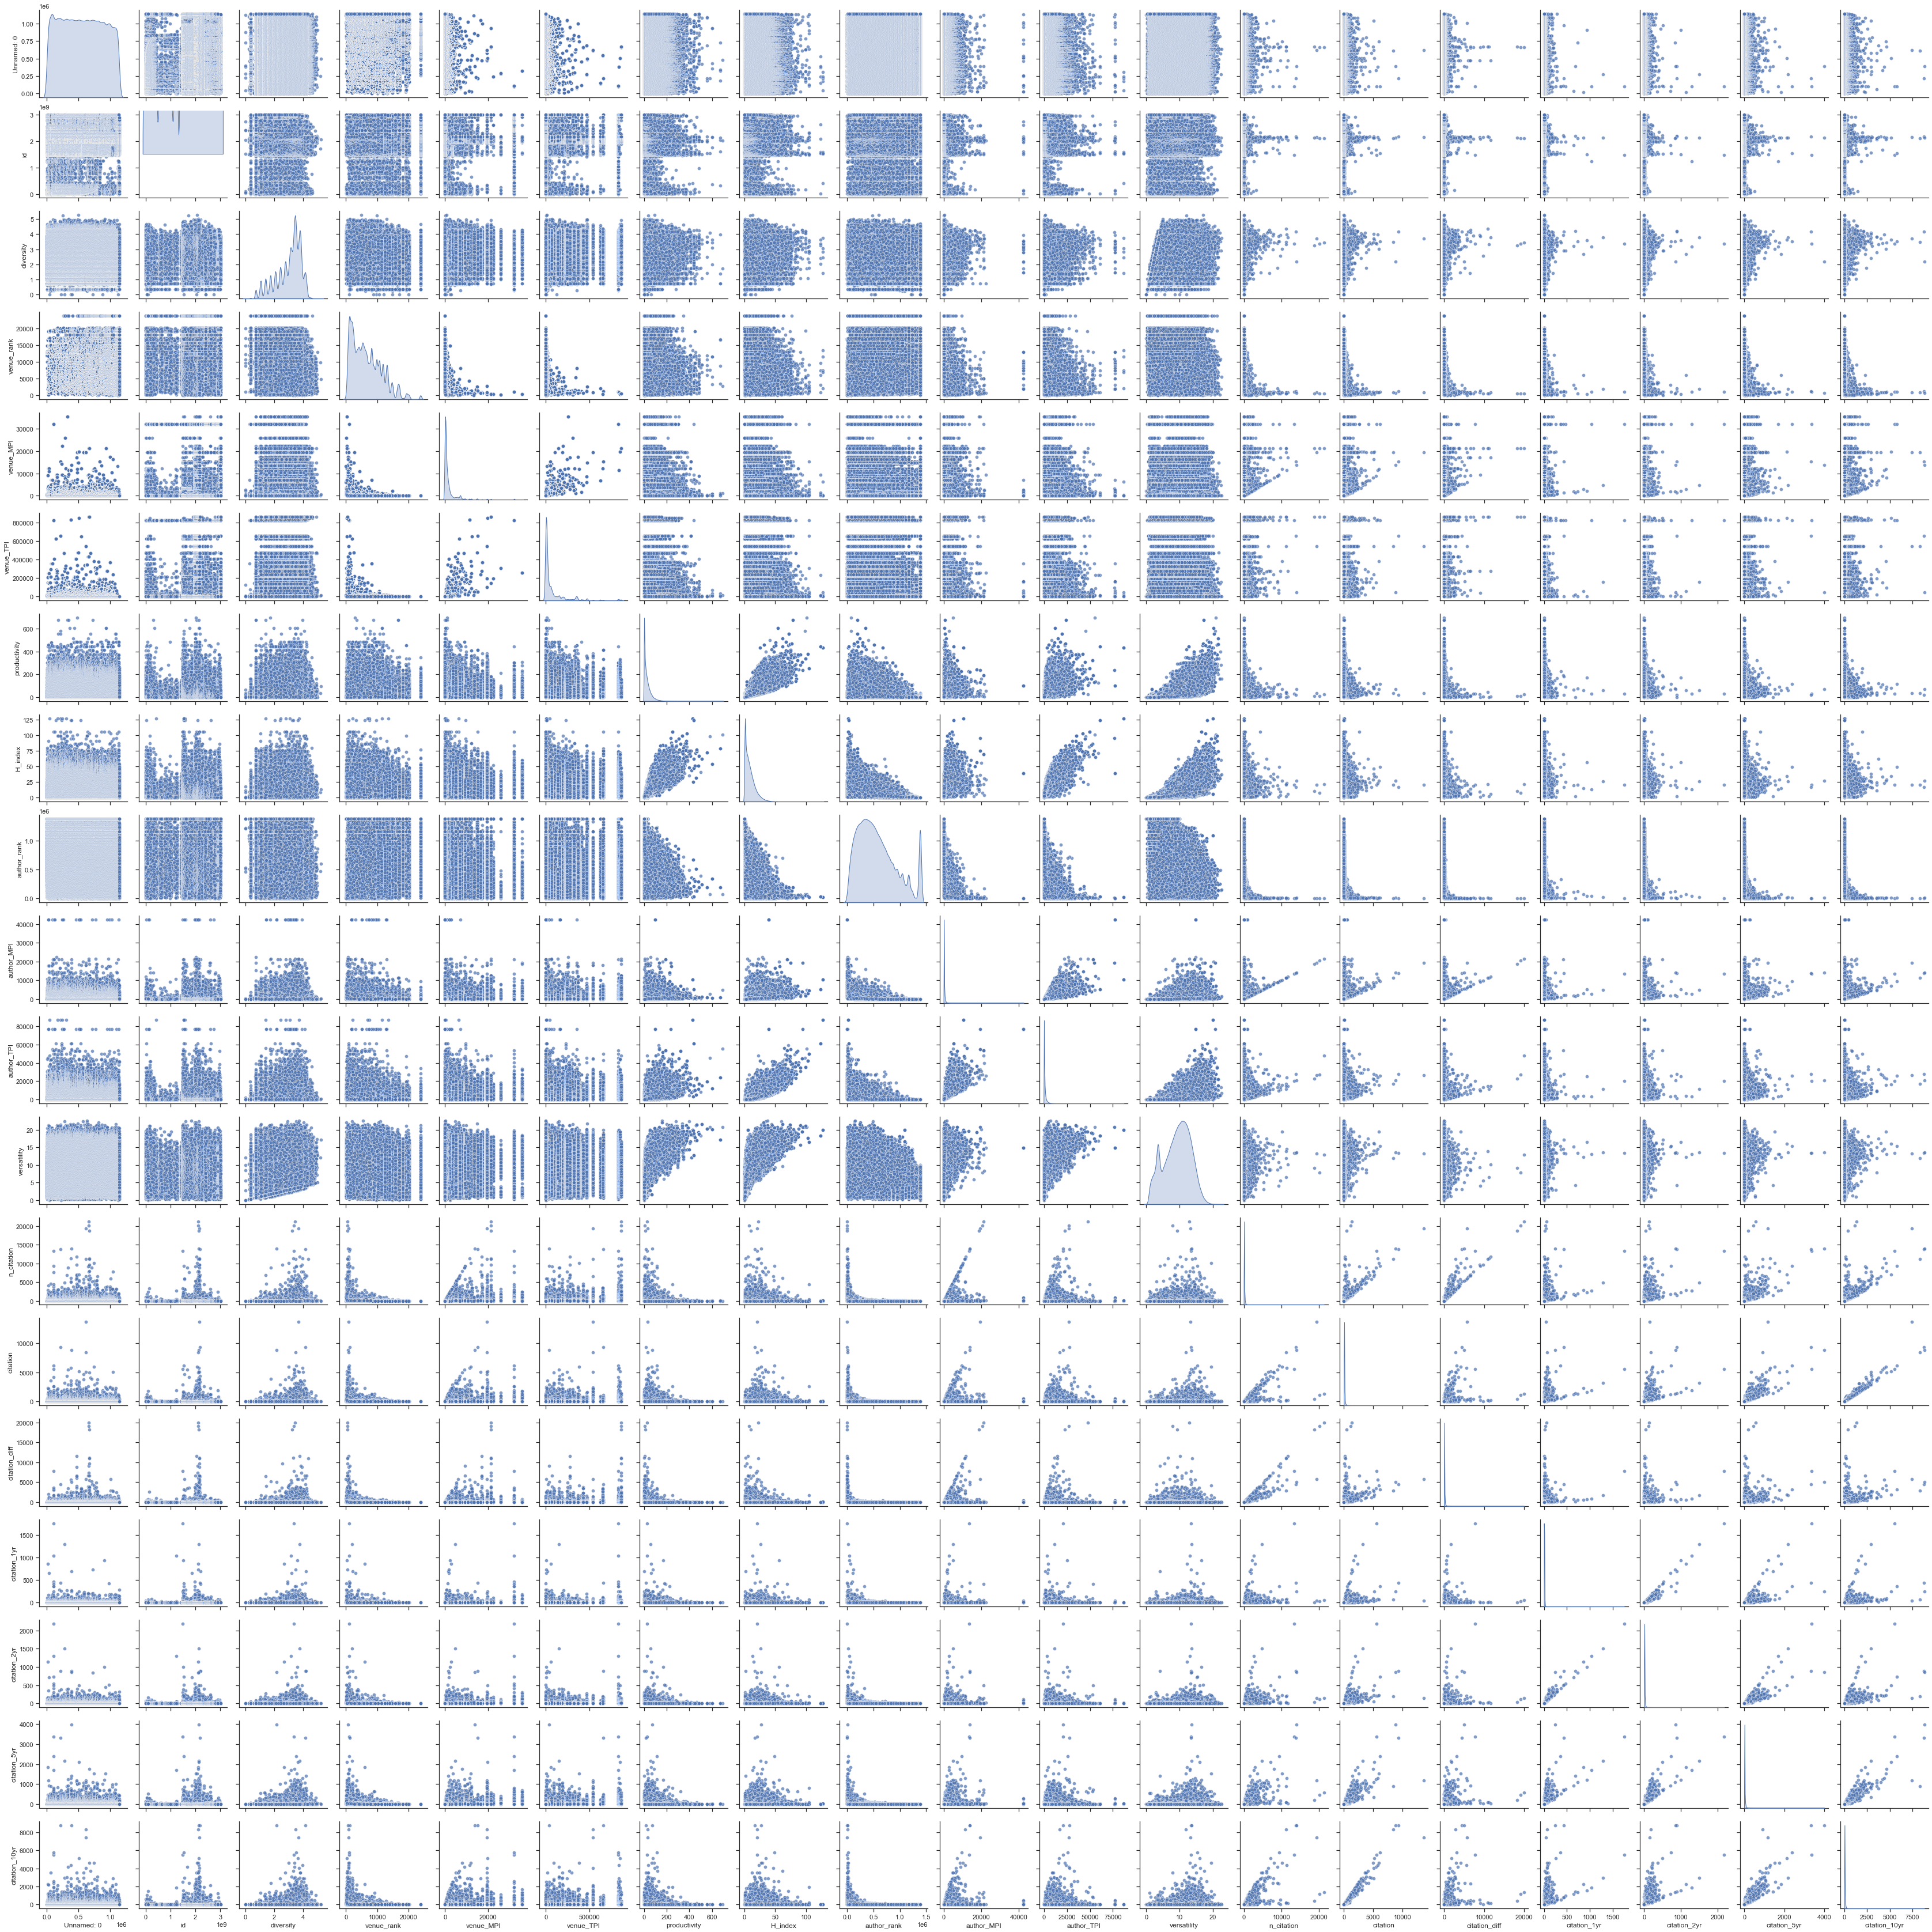

In [68]:
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(train, diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

## Hyperparameter tuning

#### Checking the current random forest parameters:

In [9]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


Lets optimize the following features:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

#### Creating the parameter grid:

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 32, 55, 77, 100]}


#### Random forest training:

In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor_optimized = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = regressor_optimized, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  4.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   random_state=42, verbose=2)

#### The best parameters:

In [14]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}